In [1]:
# https://arxiv.org/abs/cond-mat/0703314
# https://arxiv.org/abs/0808.3779

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [3]:
@jit(nopython=True)
def calc_rsks(L):
    rs = np.arange(1,L+1) ## from 1 to L
    ks = np.linspace(np.pi/(L+1.0),L*np.pi/(L+1.0),L)
    return rs,ks

@jit(nopython=True)
def calc_eks(J,ks):
    return -2.0*J*np.cos(ks)

@jit(nopython=True)
def calc_xkrs(L,ks,rs):
    return np.sqrt(2.0/(L+1.0))*np.sin(np.outer(ks,rs))

# #@jit(nopython=True)
# def calc_ys(t,eks,xkrs):
#     expeks = np.exp(1j*t*eks)
#     return np.einsum("ik,k,kj->ij",xkrs,expeks,xkrs)

@jit(nopython=True)
def calc_ys(t,eks,xkrs):
    xc = (1.0+0.0j)*xkrs # for numba
    expeks = np.diag(np.exp(1j*t*eks))
    return xc @ expeks @ xc

@jit(nopython=True)
def calc_fs(ys,initial_state):
    diag = (1.0+0.0j)*np.diag(initial_state)
    return ys @ diag @ ys.T.conjugate()

@jit(nopython=True)
def get_dat(L,L_A,J,ts,period=1):
    rs, ks = calc_rsks(L)
    eks = calc_eks(J,ks)
    xkrs = calc_xkrs(L,ks,rs)
    initial_state = np.array([1.0 if i%period==0 else 0.0 for i in range(L)])
    ee1s = np.zeros(len(ts),dtype=np.float64)
    ee2s = np.zeros(len(ts),dtype=np.float64)
    for i,t in enumerate(ts):
        ys = calc_ys(t,eks,xkrs)
        fs = calc_fs(ys,initial_state)
        eig = np.linalg.eigvalsh(fs[0:L_A,0:L_A])
        peig = 1.0 + eig
        eig[eig<1e-16] = np.finfo(eig.dtype).eps
        peig[peig<1e-16] = np.finfo(peig.dtype).eps
        ee1s[i] = - np.sum(eig*np.log(eig)) + np.sum(peig*np.log(peig))
        ee2s[i] = np.sum(np.log(peig**2-eig**2))
    return ee1s, ee2s

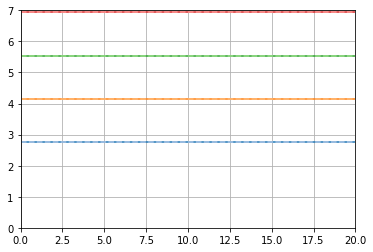

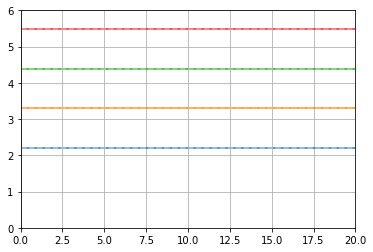

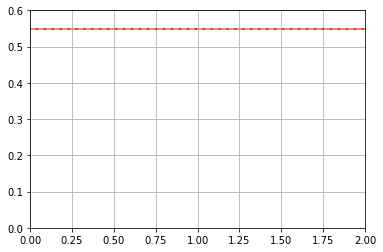

In [4]:
## Mott insulator initial

period = 1
J = 1.0
ts = np.linspace(0,20,201)
Ls = [4,6,8,10]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period)

cmap = plt.get_cmap("tab20")
plt.xlim(0,20)
plt.ylim(0,7)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts,ee1s[i],color=cmap(2*i+0))
    plt.plot([np.min(ts),np.max(ts)],[2.0*np.log(2.0)*L_A,2.0*np.log(2.0)*L_A],ls="--",color=cmap(2*i+1))
plt.show()

cmap = plt.get_cmap("tab20")
plt.xlim(0,20)
plt.ylim(0,6)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts,ee2s[i],color=cmap(2*i+0))
    plt.plot([np.min(ts),np.max(ts)],[np.log(3.0)*L_A,np.log(3.0)*L_A],ls="--",color=cmap(2*i+1))
plt.show()

cmap = plt.get_cmap("tab20")
plt.xlim(0,2)
plt.ylim(0,0.6)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
    plt.plot([np.min(ts)/L,np.max(ts)/L],[np.log(3.0)*L_A/L,np.log(3.0)*L_A/L],ls="--",color=cmap(2*i+1))
plt.show()

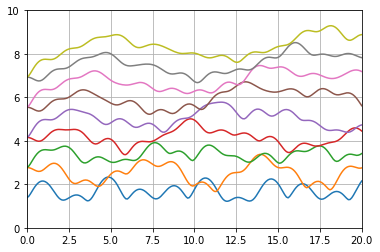

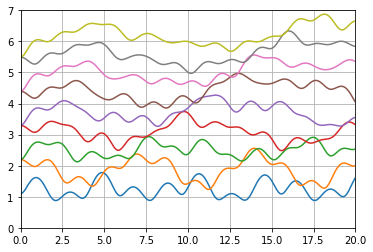

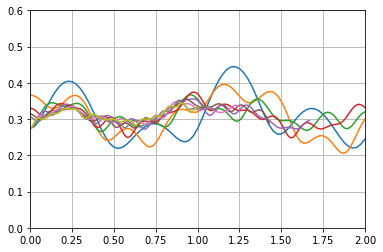

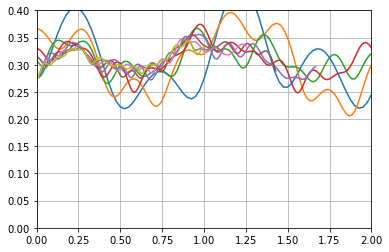

In [5]:
## CDW 010101... initial

period = 2
J = 1.0
ts = np.linspace(0,20,201)
Ls = [4,6,8,10,12,14,16,18,20]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period)

cmap = plt.get_cmap("tab20")
plt.xlim(0,20)
plt.ylim(0,10)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts,ee1s[i],color=cmap(2*i+0))
plt.show()

cmap = plt.get_cmap("tab20")
plt.xlim(0,20)
plt.ylim(0,7)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts,ee2s[i],color=cmap(2*i+0))
plt.show()

cmap = plt.get_cmap("tab20")
plt.xlim(0,2)
plt.ylim(0,0.6)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

cmap = plt.get_cmap("tab20")
plt.xlim(0,2)
plt.ylim(0,0.4)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

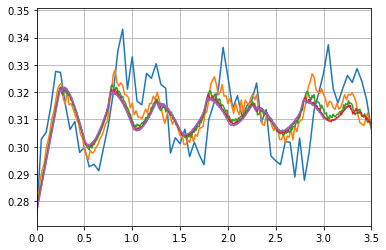

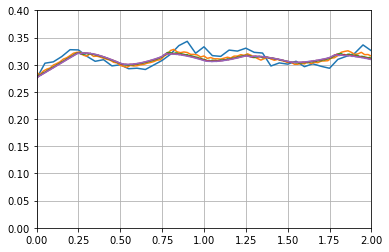

In [6]:
## CDW 010101... initial

period = 2
J = 1.0
ts = np.linspace(0,600,601)
Ls = [20,50,100,150,200]

ee1s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
ee2s = np.zeros((len(Ls),len(ts)),dtype=np.float64)
for i,L in enumerate(Ls):
    L_A = L//2
    ee1s[i], ee2s[i] = get_dat(L,L_A,J,ts,period)

cmap = plt.get_cmap("tab20")
plt.xlim(0,3.5)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()

cmap = plt.get_cmap("tab20")
plt.xlim(0,2)
plt.ylim(0,0.4)
plt.grid()
for i,L in enumerate(Ls):
    L_A = L//2
    plt.plot(ts/L,ee2s[i]/L,color=cmap(2*i+0))
plt.show()